## An analysis that compares the difference between two ways to get the cell barcodes to use:
1. Downloaded directly the barcodes from GEO GSE117131. (This showed that there were cell barcodes in human file that mapped to the mouse and other human samples were mapping to human2_002.)
2. From the bam file, used a) cellranger bamtofastq and b)cellranger count to establish the barcodes
3. Take every barcode from the bam file and and set a counts filter (not compared here)

### Data files

In [1]:
geo_barcodes_f = "/data2/mito_lineage/data/raw/GSM3271867/barcodes/Human2_002_Barcodes.txt"
cellranger_barcodes_f = "/data2/isshamie/mito_lineage/data/processed/GSM3271867/Human2_002/outs/filtered_feature_bc_matrix/barcodes.tsv.gz"


In [2]:
geo_all_human_f = "/data2/mito_lineage/data/raw/GSM3271867/barcodes/GSE117131_Zhu_SC-10X_human_annotation.txt"


### Load packages

In [3]:
import pandas as pd
import  matplotlib.pyplot as plt
%matplotlib inline

from matplotlib_venn import venn2

In [4]:
cellranger_barcodes = pd.read_csv(cellranger_barcodes_f, sep="\t", header=None)
cellranger_barcodes

,0
0,AAACCTGAGCACGCCT-1
1,AAACCTGGTGTTCGAT-1
2,AAACCTGTCCACGACG-1
3,AAACCTGTCCCGGATG-1
4,AAACGGGAGAGGACGG-1
...,...
1387,TTTGGTTTCCTCTAGC-1
1388,TTTGGTTTCGGCGCAT-1
1389,TTTGTCAAGCTTCGCG-1
1390,TTTGTCAGTAGGCATG-1


In [5]:
geo_barcodes = pd.read_csv(geo_barcodes_f,sep="\t", header=None)
geo_barcodes

,0
0,AAACCTGGTGTTCGAT
1,AAACCTGTCCCGGATG
2,AAACGGGCACGGTAAG
3,AAACGGGCAGTGACAG
4,AAACGGGGTCTCCACT
...,...
665,TTTGGTTCATACAGCT
666,TTTGGTTTCCTCTAGC
667,TTTGTCAAGCTTCGCG
668,TTTGTCAGTAGGCATG


In [6]:
geo_all_human = pd.read_csv(geo_all_human_f, sep="\t")
geo_all_human

,Unnamed: 0,Barcode,Sample.Name
0,1,AAAGATGAGGGTATCG.1,Human1_001
1,2,AAATGCCAGTACATGA.1,Human1_001
2,3,AACCATGCATCACGAT.1,Human1_001
3,4,AACGTTGTCTATGTGG.1,Human1_001
4,5,AACTCCCGTCTCTCGT.1,Human1_001
...,...,...,...
2070,2071,TTTGGTTCATACAGCT.4,Human2_002
2071,2072,TTTGGTTTCCTCTAGC.4,Human2_002
2072,2073,TTTGTCAAGCTTCGCG.4,Human2_002
2073,2074,TTTGTCAGTAGGCATG.4,Human2_002


In [7]:
geo_all_human["Barcodes"] = geo_all_human["Barcode"].apply(lambda x:x.split(".")[0]).values.astype(str)
geo_all_human

,Unnamed: 0,Barcode,Sample.Name,Barcodes
0,1,AAAGATGAGGGTATCG.1,Human1_001,AAAGATGAGGGTATCG
1,2,AAATGCCAGTACATGA.1,Human1_001,AAATGCCAGTACATGA
2,3,AACCATGCATCACGAT.1,Human1_001,AACCATGCATCACGAT
3,4,AACGTTGTCTATGTGG.1,Human1_001,AACGTTGTCTATGTGG
4,5,AACTCCCGTCTCTCGT.1,Human1_001,AACTCCCGTCTCTCGT
...,...,...,...,...
2070,2071,TTTGGTTCATACAGCT.4,Human2_002,TTTGGTTCATACAGCT
2071,2072,TTTGGTTTCCTCTAGC.4,Human2_002,TTTGGTTTCCTCTAGC
2072,2073,TTTGTCAAGCTTCGCG.4,Human2_002,TTTGTCAAGCTTCGCG
2073,2074,TTTGTCAGTAGGCATG.4,Human2_002,TTTGTCAGTAGGCATG


In [8]:
for i in cellranger_barcodes[0]:
    if i.split("-")[-1] != "1":
        print(i)


In [9]:
cellranger_barcodes = cellranger_barcodes[0].apply(lambda x:x.split("-")[0]).values.astype(str)

In [10]:
geo_barcodes = geo_barcodes[0].values

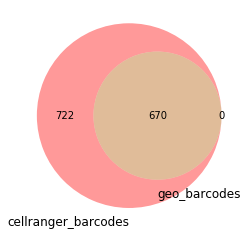

In [11]:
v = venn2(subsets=[set(cellranger_barcodes),set(geo_barcodes)], 
          set_labels = ('cellranger_barcodes', 'geo_barcodes'))

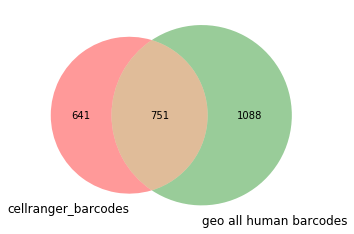

In [12]:
v = venn2(subsets=[set(cellranger_barcodes),set(geo_all_human["Barcodes"])], 
          set_labels = ('cellranger_barcodes', 'geo all human barcodes'))

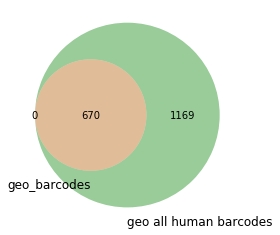

In [13]:
v = venn2(subsets=[set(geo_barcodes),set(geo_all_human["Barcodes"])], 
          set_labels = ('geo_barcodes', 'geo all human barcodes'))